<a href="https://colab.research.google.com/github/Hemanthmuthyal/MLassignment/blob/main/cropyeildprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pesticides_data = pd.read_csv('/content/drive/MyDrive/PROJECTS/Crop yield prediction/Dataset/pesticides.csv')
rainfall_data = pd.read_csv('/content/drive/MyDrive/PROJECTS/Crop yield prediction/Dataset/rainfall.csv')
temp_data = pd.read_csv('/content/drive/MyDrive/PROJECTS/Crop yield prediction/Dataset/temp.csv')
yield_data = pd.read_csv('/content/drive/MyDrive/PROJECTS/Crop yield prediction/Dataset/yield.csv')

In [4]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [5]:
pesticides_data = pesticides_data.rename(index=str, columns={"Value": "pesticides_tonnes"})

In [6]:
pesticides_data.head()

,Domain,Area,Element,Item,Year,Unit,pesticides_tonnes
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [7]:
pesticides_data =pesticides_data.drop(['Element','Domain','Unit','Item'], axis=1)

In [8]:
pesticides_data.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [9]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [10]:
pesticides_data.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [11]:
pesticides_data.isnull().sum()

Area                 0
Year                 0
pesticides_tonnes    0
dtype: int64

In [12]:
temp_data

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [13]:
temp_data.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [14]:
temp_data.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [15]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [17]:
temp_data = temp_data.rename(index=str, columns={"year": "Year", "country":'Area'})
temp_data.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [18]:
temp_data.isnull().sum()

Year           0
Area           0
avg_temp    2547
dtype: int64

In [19]:
temp_data=temp_data.dropna()

In [20]:
temp_data.isnull().sum()

Year        0
Area        0
avg_temp    0
dtype: int64

In [21]:
rainfall_data

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
...,...,...,...
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657


In [22]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [23]:
rainfall_data = rainfall_data.rename(index=str, columns={" Area": 'Area'})

In [24]:
rainfall_data['average_rain_fall_mm_per_year'] = pd.to_numeric(rainfall_data['average_rain_fall_mm_per_year'],errors = 'coerce')

In [25]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [26]:
rainfall_data.isnull().sum()

Area                               0
Year                               0
average_rain_fall_mm_per_year    780
dtype: int64

In [27]:
rainfall_data=rainfall_data.dropna()

In [28]:
yield_data

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [29]:
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [30]:
yield_data = yield_data.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
yield_data.head()

,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [31]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    56717 non-null  object
 1   Item    56717 non-null  object
 2   Year    56717 non-null  int64 
 3   Value   56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [32]:
yield_data.describe()

,Year,Value
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [33]:
yield_data.isnull().sum()

Area     0
Item     0
Year     0
Value    0
dtype: int64

In [34]:
yield_df = pd.merge(yield_data,rainfall_data, on=['Year','Area'])

In [35]:
yield_df

,Area,Item,Year,Value,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0
...,...,...,...,...,...
25380,Zimbabwe,"Rice, paddy",2016,22828,657.0
25381,Zimbabwe,Sorghum,2016,2688,657.0
25382,Zimbabwe,Soybeans,2016,12727,657.0
25383,Zimbabwe,Sweet potatoes,2016,22212,657.0


In [36]:
yield_df = pd.merge(yield_df,pesticides_data, on=['Year','Area'])

In [37]:
yield_df

,Area,Item,Year,Value,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.00
1,Albania,Potatoes,1990,66667,1485.0,121.00
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00
3,Albania,Sorghum,1990,12500,1485.0,121.00
4,Albania,Soybeans,1990,7000,1485.0,121.00
...,...,...,...,...,...,...
18944,Zimbabwe,"Rice, paddy",2016,22828,657.0,2185.07
18945,Zimbabwe,Sorghum,2016,2688,657.0,2185.07
18946,Zimbabwe,Soybeans,2016,12727,657.0,2185.07
18947,Zimbabwe,Sweet potatoes,2016,22212,657.0,2185.07


In [38]:
yield_df = pd.merge(yield_df,temp_data, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,Value,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [39]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   Value                          28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [40]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
Value                            0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [41]:
yield_df.Item.unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [42]:
yield_df.describe()

,Year,Value,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


<ipython-input-43-91f32acf3eed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yield_df.corr(), annot=True)


<Axes: >

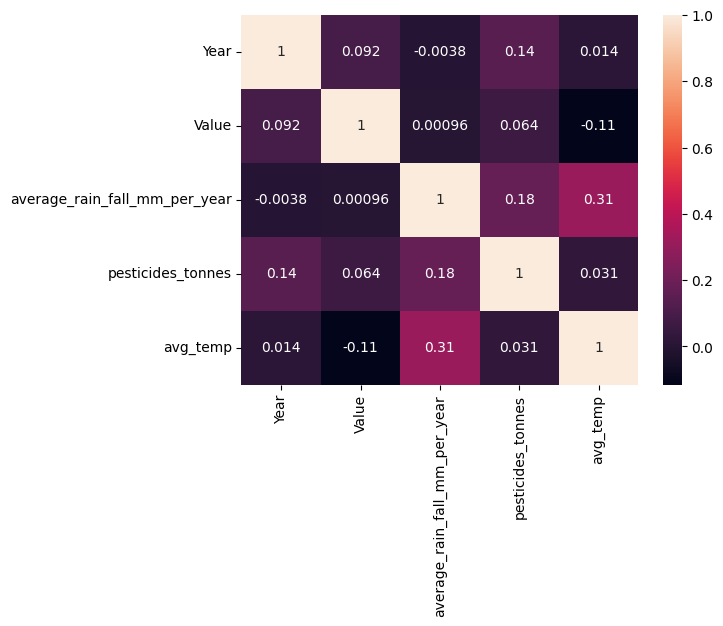

In [43]:
sns.heatmap(yield_df.corr(), annot=True)

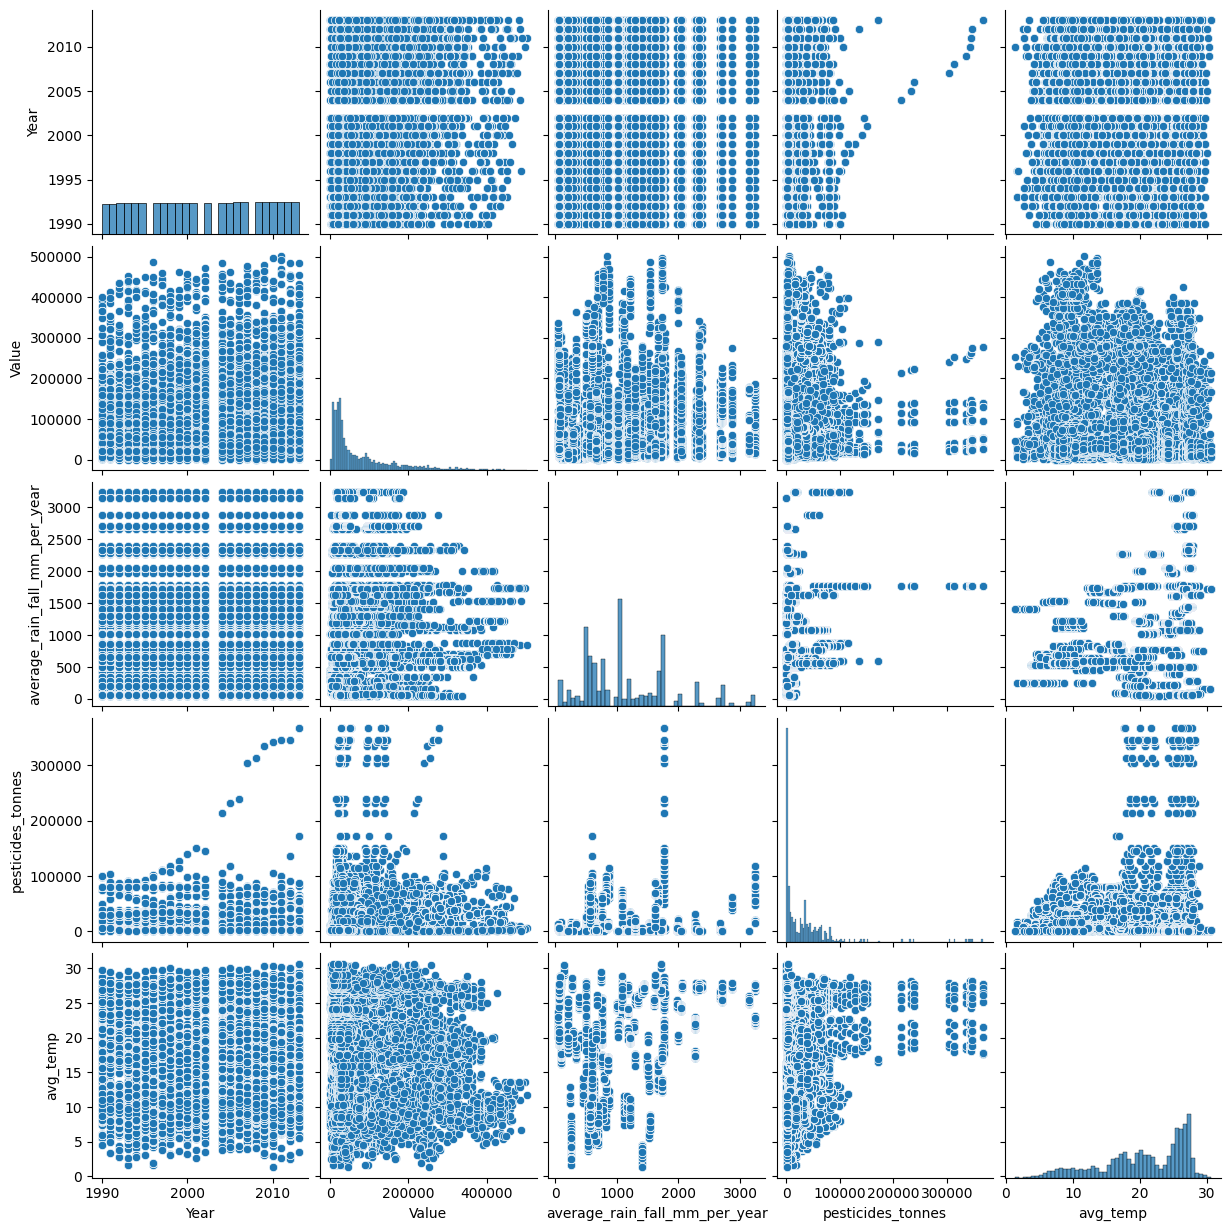

In [44]:
sns.pairplot(yield_df, diag_kind='hist')

<Axes: xlabel='Value', ylabel='Count'>

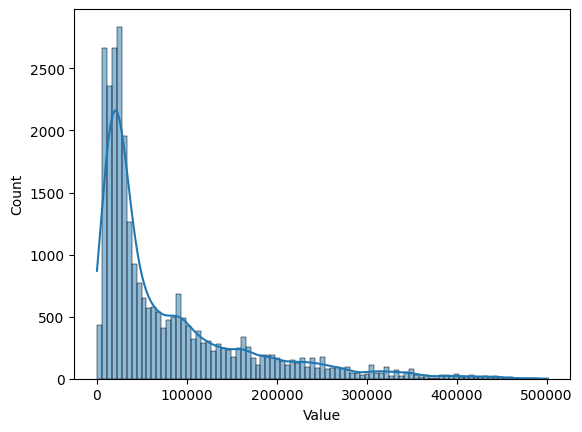

In [45]:
sns.histplot(yield_df['Value'], kde=True)

<Axes: xlabel='pesticides_tonnes', ylabel='Value'>

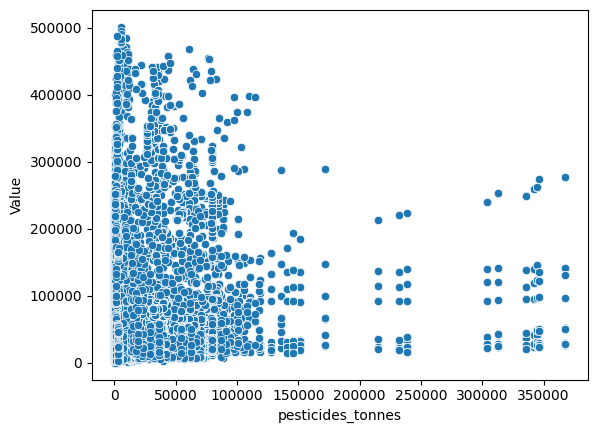

In [46]:
sns.scatterplot(x='pesticides_tonnes', y='Value', data=yield_df)

<Axes: xlabel='average_rain_fall_mm_per_year', ylabel='Value'>

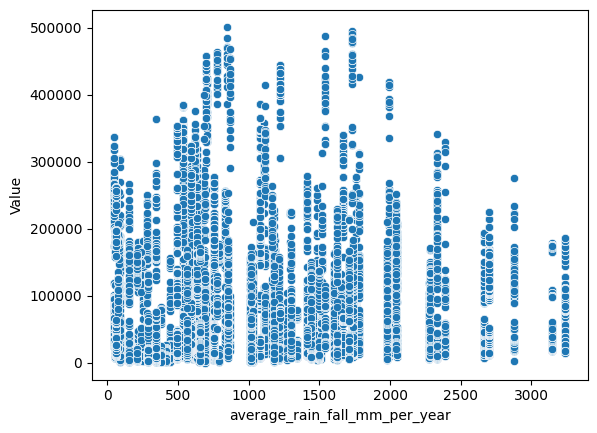

In [47]:
sns.scatterplot(x='average_rain_fall_mm_per_year', y='Value', data=yield_df)

<Axes: xlabel='avg_temp', ylabel='Value'>

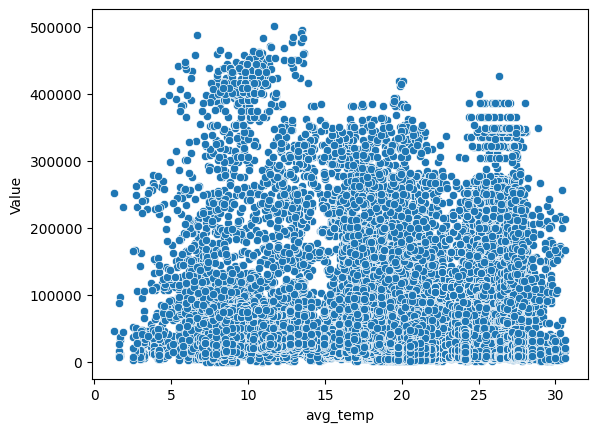

In [48]:
sns.scatterplot(x='avg_temp', y='Value', data=yield_df)

In [49]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   Value                          28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [50]:
yield_df.to_csv('yield_data.csv', index=False)


In [51]:
yield_df

,Area,Item,Year,Value,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [52]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Area', 'Item']
le = LabelEncoder()
for col in cat_cols:
    yield_df[col] = le.fit_transform(yield_df[col])



In [53]:
yield_df.head()

,Area,Item,Year,Value,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = yield_df.drop(['Value'], axis=1) 
y = yield_df['Value'] 
num_cols = ['Year', 'pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical variables
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (22593, 6)
y_train shape: (22593,)
X_test shape: (5649, 6)
y_test shape: (5649,)


In [55]:
X_train

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
5493,18,5,0.490047,0.640947,-0.604548,0.763216
10969,42,6,-1.353459,-0.093063,0.562298,0.850353
2001,8,0,-0.644418,0.201386,-0.610302,0.834510
22157,73,3,-0.644418,-0.922875,-0.335919,0.509728
311,2,7,0.490047,-0.195909,-0.617717,0.612708
...,...,...,...,...,...,...
21575,71,4,-0.077186,-1.406110,-0.617867,1.412779
5390,18,2,-1.069843,0.640947,-0.611522,0.695091
860,5,3,-1.495267,-0.866521,-0.320408,-0.287174
15795,46,7,-0.786226,-0.446684,0.626113,-1.309047


In [56]:
y_train

5493      13173
10969      8947
2001      75317
22157    112295
311       46159
          ...  
21575     27565
5390      55053
860      285359
15795    221667
23654     88745
Name: Value, Length: 22593, dtype: int64

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
print('Linear regression R2:', lr_r2)

# Fit a decision tree regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
print('Decision tree R2:', dt_r2)

# Fit a random forest regression model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
print('Random forest R2:', rf_r2)

# Fit an SVM regression model
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_r2 = r2_score(y_test, svm_pred)
print('SVM R2:', svm_r2)

# Fit an XGBoost regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
print('XGBoost R2:', xgb_r2)

from sklearn.neural_network import MLPRegressor
# Fit an artificial neural network (ANN) model
ann = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=100000)
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)
ann_r2 = r2_score(y_test, ann_pred)
print('ANN R2:', ann_r2)

Linear regression R2: 0.0842517227604167
Decision tree R2: 0.9770069961490591
Random forest R2: 0.9860586279750241
SVM R2: -0.2047990977886669
XGBoost R2: 0.9733281698479938
ANN R2: 0.9067605250480243


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
print('Linear regression R2:', lr_r2)
print('Linear regression MAE:', lr_mae)
print('Linear regression MSE:', lr_mse)
print('Linear regression RMSE:', lr_rmse)

# Fit a decision tree regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
print('Decision tree R2:', dt_r2)
print('Decision tree MAE:', dt_mae)
print('Decision tree MSE:', dt_mse)
print('Decision tree RMSE:', dt_rmse)

# Fit a random forest regression model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print('Random forest R2:', rf_r2)
print('Random forest MAE:', rf_mae)
print('Random forest MSE:', rf_mse)
print('Random forest RMSE:', rf_rmse)

# Fit an SVM regression model
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_r2 = r2_score(y_test, svm_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_rmse = mean_squared_error(y_test, svm_pred, squared=False)
print('SVM R2:', svm_r2)
print('SVM MAE:', svm_mae)
print('SVM MSE:', svm_mse)
print('SVM RMSE:', svm_rmse)

# Fit an XGBoost regression model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print('XGBoost R2:', xgb_r2)
print('XGBoost MAE:', xgb_mae)
print('XGBoost MSE:', xgb_mse)


Linear regression R2: 0.0862852785381315
Linear regression MAE: 62779.325885584774
Linear regression MSE: 6772588013.105366
Linear regression RMSE: 82295.73508454351
Decision tree R2: 0.9728935110195932
Decision tree MAE: 4152.771627522719
Decision tree MSE: 200917286.36303553
Decision tree RMSE: 14174.529493532953
Random forest R2: 0.9845895135932607
Random forest MAE: 3988.2006939690787
Random forest MSE: 114224793.65049964
Random forest RMSE: 10687.599994877224
SVM R2: -0.20401235980694032
SVM MAE: 57669.243662090405
SVM MSE: 8924316839.957457
SVM RMSE: 94468.60240290134
XGBoost R2: 0.9732400720167789
XGBoost MAE: 7954.618516940231
XGBoost MSE: 198348525.23856372


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
import pickle

# Define three best models
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

# Create a voting regressor
vr = VotingRegressor(estimators=[('dt', dt), ('rf', rf), ('xgb', xgb)])

# Fit voting regressor to training data
vr.fit(X_train, y_train)

# Generate predictions on test data
vr_pred = vr.predict(X_test)

# Evaluate voting regressor on test data
vr_r2 = r2_score(y_test, vr_pred)
print('Fused model R2:', vr_r2)

# Save fused model as a file
filename = '/content/drive/MyDrive/PROJECTS/Crop yield prediction/models/fused_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(vr, file)


Fused model R2: 0.9837175795503039


In [60]:
import joblib
joblib.dump(rf, '/content/drive/MyDrive/PROJECTS/Crop yield prediction/models/RandomForest_model.pkl')

['/content/drive/MyDrive/PROJECTS/Crop yield prediction/models/RandomForest_model.pkl']

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Define the random forest model with the best hyperparameters
rf = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=5, min_samples_leaf=1)

# Initialize dictionary to store R2 scores for each crop item
item_scores = {}

# Loop over each crop item in the dataset
for item in yield_df['Item'].unique():
    
    # Filter the data for the current crop item
    item_df = yield_df[yield_df['Item'] == item]
    X_item = item_df.drop('Value', axis=1)
    y_item = item_df['Value']
    
    # Split the data into training and testing sets
    X_item_train, X_item_test, y_item_train, y_item_test = train_test_split(X_item, y_item, test_size=0.2, random_state=42)
    
    # Fit the model to the training data and make predictions on the test data
    rf.fit(X_item_train, y_item_train)
    item_pred = rf.predict(X_item_test)
    
    # Calculate the R2 score and store it in the dictionary
    item_score = r2_score(y_item_test, item_pred)
    item_scores[item] = item_score

# Print the R2 scores for each crop item
print('R2 scores for each crop item:')
for item, score in item_scores.items():
    print(item, score)


R2 scores for each crop item:
1 0.9623424057491061
3 0.9655978869486743
4 0.9595113297059593
5 0.9263695878051165
6 0.9325096716204688
8 0.9640342308101799
0 0.9759001608181598
7 0.9399650611149669
2 0.9036221143307341
9 0.9443141467661147


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

crop = 1
crop_df = yield_df[yield_df['Item'] == crop]

# Split the data into training and testing sets
X = crop_df.drop(['Value'], axis=1)
y = crop_df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=5, min_samples_leaf=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



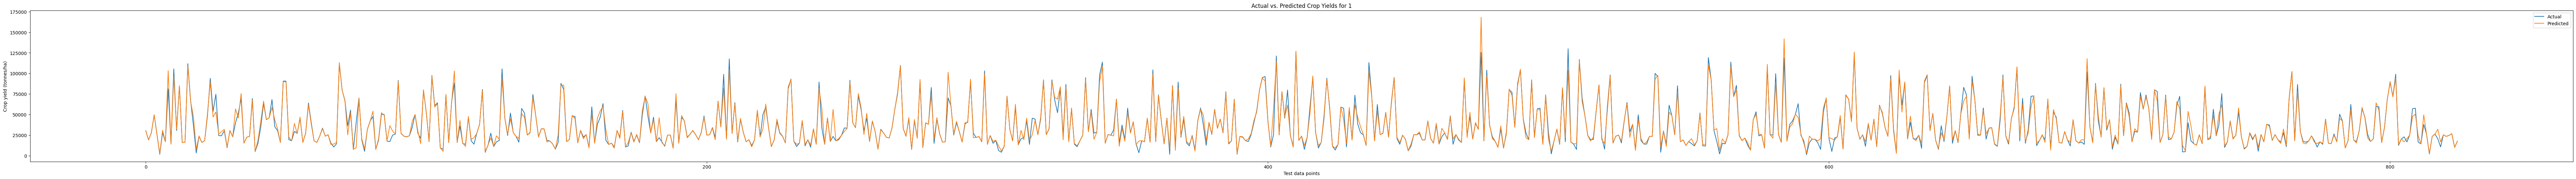

In [63]:
plt.figure(figsize=(100, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Test data points')
plt.ylabel('Crop yield (tonnes/ha)')
plt.title('Actual vs. Predicted Crop Yields for {}'.format(crop))
plt.legend()
plt.show()

In [64]:
df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(df)

     Actual     Predicted
0     30368  30375.436855
1     19125  19127.572667
2     27765  27761.008259
3     49360  49692.513448
4     26005  25910.453229
..      ...           ...
820   23352  23351.123390
821   24615  24743.570314
822   26629  26640.720957
823    9993  10197.703237
824   17631  17662.493115

[825 rows x 2 columns]


In [65]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [66]:
import pandas as pd
import gradio as gr
from joblib import load

model = load('/content/drive/MyDrive/PROJECTS/Crop yield prediction/models/fused_model.pkl')
yield_df = pd.read_csv('/content/drive/MyDrive/PROJECTS/Crop yield prediction/models/yield_data.csv')
area_le = load('/content/drive/MyDrive/PROJECTS/Crop yield prediction/models/area_le.pkl')
item_le = load('/content/drive/MyDrive/PROJECTS/Crop yield prediction/models/item_le.pkl')
area = gr.inputs.Dropdown(choices=list(yield_df['Area'].unique()), label='Area')
item = gr.inputs.Dropdown(choices=list(yield_df['Item'].unique()), label='Item')
year = gr.inputs.Number(default=2013, label='Year')
rainfall = gr.inputs.Number(default=657, label='Average rainfall (mm/year)')
pesticides = gr.inputs.Number(default=2550.07, label='Pesticides used (tonnes)')
temperature = gr.inputs.Number(default=19.76, label='Average temperature (°C)')

output = gr.outputs.Textbox(label='Predicted crop yield (tonnes/ha)')

def predict_yield(area, item, year, rainfall, pesticides, temperature):
    area = area_le.transform([area])[0]
    item = item_le.transform([item])[0]
    custom_input = pd.DataFrame({
        'Area': [area],
        'Item': [item],
        'Year': [year],
        'average_rain_fall_mm_per_year': [rainfall],
        'pesticides_tonnes': [pesticides],
        'avg_temp': [temperature]
    })


    predicted_yield = model.predict(custom_input)
    return round(predicted_yield[0], 2)

interface = gr.Interface(predict_yield, [area, item, year, rainfall, pesticides, temperature], output,
                         title='Crop Yield Predictor',
                         description='Enter data for the area, crop item, year, rainfall, pesticides, and temperature to predict crop yield')

interface.launch(debug=True,share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://167f0ea55fd327f031.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://167f0ea55fd327f031.gradio.live
